# E-commerce segmentation and recommender system

## CSCA 5632 Unsupervised Algorithms in Machine Learning Final Project

Nicolas Veas

## GITHUB REPOSITORY

https://github.com/nicovy/ecommerce

## Introduction

Understanding the audience of an e-commerce platform is crucial for effective marketing, as it enables the use of personalized strategies. Developing a customer segmentation model allows us to understand the different profiles and preferences of the e-commerce customers. This enhances customer engagement and supports implementing a recommender system that could help improve the shopping experience by providing personalized product suggestions that a specific customer will likely purchase.

In this project, I'll use unsupervised learning models to build a customer segmentation and a recommender system.

The data used is from kaggle from the following link:

https://www.kaggle.com/datasets/shrishtimanja/ecommerce-dataset-for-data-analysis

## Data

-  The data set consists of 14 features and 55000 entires of customer transactions.

## Objective

-  To segment customers into distinct groups
-  To build a recommender system that recommend products to customers

## Data Dictionary

-  CID (Customer ID): A unique identifier for each customer.
-  TID (Transaction ID): A unique identifier for each transaction.
-  Gender: The gender of the customer, categorized as Male or Female.
-  Age Group: Age group of the customer, divided into several ranges.
-  Purchase Date: The timestamp of when the transaction took place.
-  Product Category: The category of the product purchased, such as Electronics, Apparel, etc.
-  Discount Availed: Indicates whether the customer availed any discount (Yes/No).
-  Discount Name: Name of the discount applied (e.g., FESTIVE50).
-  Discount Amount (INR): The amount of discount availed by the customer.
-  Gross Amount: The total amount before applying any discount.
-  Net Amount: The final amount after applying the discount.
-  Purchase Method: The payment method used (e.g., Credit Card, Debit Card, etc.).
-  Location: The city where the purchase took place.

# E-commerce segmentation and recommender system

## CSCA 5632 Unsupervised Algorithms in Machine Learning Final Project

Nicolas Veas

## GITHUB REPOSITORY

https://github.com/nicovy/bank-personal-Loan

## Introduction

Understanding the audience of an ecommerce platform is crucial for effective marketing, as it enables the use of personalized strategies. Developing a customer segmentation model allows us to understand the different profiles and preferences of the ecommerce customers. This enhances customer engagement and also supports the implementation of a recommender system that could help improving the shopping experience by providing personalized product suggestions that a certain customer will be likely to purchase.
 

In this project, I'll use unsupervised learning model to segment customers and build a recommender system.

The data used is from kaggle from the following link:

https://www.kaggle.com/datasets/shrishtimanja/ecommerce-dataset-for-data-analysis

## Data

-  The data set consists of 13 features and 55000 entires of customer transactions.

## Objective

-  To segment customers into distinct groups
-  To build a recommender system that recommend products to customers

## Data Dictionary

-  CID (Customer ID): A unique identifier for each customer.
-  TID (Transaction ID): A unique identifier for each transaction.
-  Gender: The gender of the customer, categorized as Male or Female.
-  Age Group: Age group of the customer, divided into several ranges.
-  Purchase Date: The timestamp of when the transaction took place.
-  Product Category: The category of the product purchased, such as Electronics, Apparel, etc.
-  Discount Availed: Indicates whether the customer availed any discount (Yes/No).
-  Discount Name: Name of the discount applied (e.g., FESTIVE50).
-  Discount Amount (INR): The amount of discount availed by the customer.
-  Gross Amount: The total amount before applying any discount.
-  Net Amount: The final amount after applying the discount.
-  Purchase Method: The payment method used (e.g., Credit Card, Debit Card, etc.).
-  Location: The city where the purchase took place.

# 1. Initialization

## 1.1. Load Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline
sns.set_theme()
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

## 1.2. Load the data


In [2]:
data = pd.read_csv("ecommerce_dataset.csv")
# create a duplicate
df = data.copy()

# 2. Data Overview

## 2.1. Dataset Overview

In [3]:
df.head()

CID         TID  Gender     Age Group        Purchase Date  \
0  943146  5876328741  Female         25-45  30/08/2023 20:27:08   
1  180079  1018503182    Male         25-45  23/02/2024 09:33:46   
2  337580  3814082218   Other  60 and above  06/03/2022 09:09:50   
3  180333  1395204173   Other  60 and above  04/11/2020 04:41:57   
4  447553  8009390577    Male         18-25  31/05/2022 17:00:32   

   Product Category Discount Availed    Discount Name  Discount Amount (INR)  \
0       Electronics              Yes        FESTIVE50                  64.30   
1       Electronics              Yes  SEASONALOFFER21                 175.19   
2          Clothing              Yes  SEASONALOFFER21                 211.54   
3  Sports & Fitness               No              NaN                   0.00   
4  Sports & Fitness              Yes         WELCOME5                 439.92   

   Gross Amount   Net Amount Purchase Method   Location  
0    725.304000   661.004000     Credit Card  Ahmedabad  
1   4638.991875  4463.801875     Credit Card  Bangalore  
2   1986.372575  1774.832575     Credit Card      Delhi  
3   5695.612650  5695.612650      Debit Card      Delhi  
4   2292.651500  1852.731500     Credit Card      Delhi

In [4]:
display(df.info())
# data shape
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


None

(55000, 13)

### Comments:

    Discount Name has null variables, that is because not all purchases were made with discount codes
    55000 rows
    13 columns
    3 Numerical variables
    9 Categorical variables
    Discount Ammount, Gross Amount and Net Amount are numerical variables.
    CID, TID Gender, Age Group, purchase Date, product category, discount availed, discount name, purchase method and purchase location are Categorical variables.


## 2.2. Variables overview

In [5]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

CID: 29071 unique values
TID: 55000 unique values
Gender: 3 unique values
Age Group: 5 unique values
Purchase Date: 54988 unique values
Product Category: 9 unique values
Discount Availed: 2 unique values
Discount Name: 5 unique values
Discount Amount (INR): 20578 unique values
Gross Amount: 54813 unique values
Net Amount: 54938 unique values
Purchase Method: 8 unique values
Location: 14 unique values


In [6]:
# print unique variables for coluns with less than 15 unique values
for col in df.columns:
    if df[col].nunique() < 15:
        print(f"{col}: {df[col].unique()}")

Gender: ['Female' 'Male' 'Other']
Age Group: ['25-45' '60 and above' '18-25' '45-60' 'under 18']
Product Category: ['Electronics' 'Clothing' 'Sports & Fitness' 'Pet Care' 'Home & Kitchen'
 'Books' 'Beauty and Health' 'Other' 'Toys & Games']
Discount Availed: ['Yes' 'No']
Discount Name: ['FESTIVE50' 'SEASONALOFFER21' nan 'WELCOME5' 'SAVE10' 'NEWYEARS']
Purchase Method: ['Credit Card' 'Debit Card' 'PhonePe UPI' 'Google Pay UPI' 'Net Banking'
 'Cash on Delivery' 'Paytm UPI' 'International Card']
Location: ['Ahmedabad' 'Bangalore' 'Delhi' 'Other' 'Chennai' 'Dehradun' 'Pune'
 'Hyderabad' 'Mumbai' 'Jaipur' 'Lucknow' 'Kolkata' 'Srinagar' 'Varanasi']


    5 Different age groups
    9 Product categories
    8 Payment methods
    All 14 locations are in India

## 2.3. Statistical summary


In [7]:
# Numerical
df.describe().T

count          mean           std           min  \
CID                    55000.0  5.512456e+05  2.606033e+05  1.000090e+05   
TID                    55000.0  5.504740e+09  2.594534e+09  1.000163e+09   
Discount Amount (INR)  55000.0  1.369868e+02  1.653755e+02  0.000000e+00   
Gross Amount           55000.0  3.012937e+03  1.718431e+03  1.364543e+02   
Net Amount             55000.0  2.875950e+03  1.726128e+03 -3.511198e+02   

                                25%           50%           75%           max  
CID                    3.237170e+05  5.500885e+05  7.769558e+05  9.999960e+05  
TID                    3.252604e+09  5.498383e+09  7.747933e+09  9.999393e+09  
Discount Amount (INR)  0.000000e+00  0.000000e+00  2.741150e+02  5.000000e+02  
Gross Amount           1.562111e+03  2.954266e+03  4.342222e+03  8.394826e+03  
Net Amount             1.429552e+03  2.814911e+03  4.211408e+03  8.394826e+03

    Mean discount of 136.986796 vs median of 0, which suggests the data is right-skewed
    Gross Amount and Net Amount are also skewed to the right
    There are negatives in Net Amount, which probably was mistyped


In [8]:
# Categorical
df.describe(include=["object", "category", "bool", 'datetime']).T

count unique                  top   freq
Gender            55000      3               Female  18454
Age Group         55000      5                25-45  22010
Purchase Date     55000  54988  04/07/2022 11:45:29      2
Product Category  55000      9          Electronics  16574
Discount Availed  55000      2                   No  27585
Discount Name     27415      5             NEWYEARS   8135
Purchase Method   55000      8          Credit Card  22096
Location          55000     14               Mumbai  11197

    The data contains 29071  unique customers with a maximum of 8 purchases per customer
    Gender is divided in 3 categories and majority of females
    Most customers are in the age group of 25-45 yo
    Electronics is the top category
    50.15% of the purchases were made without discount
    Credit card was the preferred purchase method among 8 different methods
    Purchases were made from 14 different locations

# 3. Data Cleaning & Transformation

## 3.1. Correct data types

In [9]:
# CID and TID should be Categorical
df["CID"] = df["CID"].astype("object")
df["TID"] = df["TID"].astype("object")
df["Gender"] = df["Gender"].astype("category")
df["Age Group"] = df["Age Group"].astype("category")
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
df["Product Category"] = df["Product Category"].astype("category")
df["Discount Availed"] = df["Discount Availed"].astype("category")
df["Discount Name"] = df["Discount Name"].astype("category")
df["Purchase Method"] = df["Purchase Method"].astype("category")
df["Location"] = df["Location"].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CID                    55000 non-null  object        
 1   TID                    55000 non-null  object        
 2   Gender                 55000 non-null  category      
 3   Age Group              55000 non-null  category      
 4   Purchase Date          55000 non-null  datetime64[ns]
 5   Product Category       55000 non-null  category      
 6   Discount Availed       55000 non-null  category      
 7   Discount Name          27415 non-null  category      
 8   Discount Amount (INR)  55000 non-null  float64       
 9   Gross Amount           55000 non-null  float64       
 10  Net Amount             55000 non-null  float64       
 11  Purchase Method        55000 non-null  category      
 12  Location               55000 non-null  category      
dtypes

## 3.2. Handle missing values

In [10]:
missing_data = df.isnull().sum()
print(missing_data)

CID                          0
TID                          0
Gender                       0
Age Group                    0
Purchase Date                0
Product Category             0
Discount Availed             0
Discount Name            27585
Discount Amount (INR)        0
Gross Amount                 0
Net Amount                   0
Purchase Method              0
Location                     0
dtype: int64


In [11]:
# Discount Name is the only column with missing values
df[df['Discount Name'].isna()]['Discount Availed'].unique()

['No']
Categories (2, object): ['No', 'Yes']

In [12]:
# Because Discount Name is missing when Discount Availed is No, we can fill the missing values with 0
# add category 0 to Discount Name
try:
   df["Discount Name"] = df["Discount Name"].cat.add_categories("0")
except:
    pass
df["Discount Name"].fillna("0", inplace=True)
# print na count
print( f"{df["Discount Name"].isna().sum()} missing values in Discount Name")
df["Discount Name"].unique()

0 missing values in Discount Name


['FESTIVE50', 'SEASONALOFFER21', '0', 'WELCOME5', 'SAVE10', 'NEWYEARS']
Categories (6, object): ['FESTIVE50', 'NEWYEARS', 'SAVE10', 'SEASONALOFFER21', 'WELCOME5', '0']

## 3.3. Cleaning Duplicates 

In [13]:
# print duplicated items
df[df.duplicated()]

Empty DataFrame
Columns: [CID, TID, Gender, Age Group, Purchase Date, Product Category, Discount Availed, Discount Name, Discount Amount (INR), Gross Amount, Net Amount, Purchase Method, Location]
Index: []

    No duplicates items to clean

## 3.4. Adjusting negative Net values

In [14]:
# print negative Net Amount
df[df["Net Amount"] < 0]

CID         TID  Gender     Age Group       Purchase Date  \
311    565676  1356242586    Male         45-60 2020-05-03 20:14:16   
383    101206  4082960786  Female         18-25 2020-05-05 07:02:36   
398    270557  9264884678    Male         45-60 2021-03-06 12:54:09   
489    334639  1610899978    Male         18-25 2022-09-18 22:31:07   
564    924584  8564435752   Other         25-45 2020-02-13 05:04:55   
...       ...         ...     ...           ...                 ...   
54271  654558  6092629329    Male         25-45 2023-02-19 10:08:25   
54280  253300  9018344109  Female  60 and above 2020-03-07 19:06:13   
54378  789978  1230560432  Female         25-45 2020-08-30 05:05:20   
54536  569063  8940735281    Male         45-60 2021-08-20 17:17:32   
54903  940867  8469174728    Male         25-45 2019-10-22 01:21:46   

        Product Category Discount Availed    Discount Name  \
311    Beauty and Health              Yes         NEWYEARS   
383          Electronics              Yes         NEWYEARS   
398       Home & Kitchen              Yes         WELCOME5   
489       Home & Kitchen              Yes         NEWYEARS   
564          Electronics              Yes           SAVE10   
...                  ...              ...              ...   
54271        Electronics              Yes  SEASONALOFFER21   
54280     Home & Kitchen              Yes  SEASONALOFFER21   
54378              Books              Yes           SAVE10   
54536        Electronics              Yes        FESTIVE50   
54903           Clothing              Yes  SEASONALOFFER21   

       Discount Amount (INR)  Gross Amount  Net Amount Purchase Method  \
311                   469.58    279.258000 -190.322000      Debit Card   
383                   358.58    204.886500 -153.693500      Debit Card   
398                   385.36    246.808100 -138.551900      Debit Card   
489                   427.33    348.448275  -78.881725     Credit Card   
564                   429.49    414.914325  -14.575675     Credit Card   
...                      ...           ...         ...             ...   
54271                 443.65    379.287000  -64.363000      Debit Card   
54280                 305.25    178.402875 -126.847125       Paytm UPI   
54378                 212.69    185.241000  -27.449000     PhonePe UPI   
54536                 492.84    216.315000 -276.525000  Google Pay UPI   
54903                 362.14    247.819000 -114.321000      Debit Card   

        Location  
311       Mumbai  
383        Delhi  
398    Bangalore  
489        Delhi  
564        Delhi  
...          ...  
54271    Chennai  
54280  Ahmedabad  
54378     Mumbai  
54536    Lucknow  
54903    Kolkata  

[613 rows x 13 columns]

    There are 613 entries with negative net amount
    Net Amount is the difference between the  Gross and Discount amount
    If the discount is greater than the gross amount the net amount should be 0.

In [15]:
# Replace negative Net Amount with 0
df.loc[df["Net Amount"] < 0, "Net Amount"] = 0
df[["Net Amount"]].describe().T

count         mean          std  min          25%          50%  \
Net Amount  55000.0  2877.175022  1724.027159  0.0  1429.551863  2814.910875   

                    75%        max  
Net Amount  4211.407838  8394.8256

## 3.5. Adjusting discount amount

In [16]:
# print discount amount over gross amount
df[df["Discount Amount (INR)"] > df["Gross Amount"]]

CID         TID  Gender     Age Group       Purchase Date  \
311    565676  1356242586    Male         45-60 2020-05-03 20:14:16   
383    101206  4082960786  Female         18-25 2020-05-05 07:02:36   
398    270557  9264884678    Male         45-60 2021-03-06 12:54:09   
489    334639  1610899978    Male         18-25 2022-09-18 22:31:07   
564    924584  8564435752   Other         25-45 2020-02-13 05:04:55   
...       ...         ...     ...           ...                 ...   
54271  654558  6092629329    Male         25-45 2023-02-19 10:08:25   
54280  253300  9018344109  Female  60 and above 2020-03-07 19:06:13   
54378  789978  1230560432  Female         25-45 2020-08-30 05:05:20   
54536  569063  8940735281    Male         45-60 2021-08-20 17:17:32   
54903  940867  8469174728    Male         25-45 2019-10-22 01:21:46   

        Product Category Discount Availed    Discount Name  \
311    Beauty and Health              Yes         NEWYEARS   
383          Electronics              Yes         NEWYEARS   
398       Home & Kitchen              Yes         WELCOME5   
489       Home & Kitchen              Yes         NEWYEARS   
564          Electronics              Yes           SAVE10   
...                  ...              ...              ...   
54271        Electronics              Yes  SEASONALOFFER21   
54280     Home & Kitchen              Yes  SEASONALOFFER21   
54378              Books              Yes           SAVE10   
54536        Electronics              Yes        FESTIVE50   
54903           Clothing              Yes  SEASONALOFFER21   

       Discount Amount (INR)  Gross Amount  Net Amount Purchase Method  \
311                   469.58    279.258000         0.0      Debit Card   
383                   358.58    204.886500         0.0      Debit Card   
398                   385.36    246.808100         0.0      Debit Card   
489                   427.33    348.448275         0.0     Credit Card   
564                   429.49    414.914325         0.0     Credit Card   
...                      ...           ...         ...             ...   
54271                 443.65    379.287000         0.0      Debit Card   
54280                 305.25    178.402875         0.0       Paytm UPI   
54378                 212.69    185.241000         0.0     PhonePe UPI   
54536                 492.84    216.315000         0.0  Google Pay UPI   
54903                 362.14    247.819000         0.0      Debit Card   

        Location  
311       Mumbai  
383        Delhi  
398    Bangalore  
489        Delhi  
564        Delhi  
...          ...  
54271    Chennai  
54280  Ahmedabad  
54378     Mumbai  
54536    Lucknow  
54903    Kolkata  

[613 rows x 13 columns]

    Discount amount should be less or equal to gross amount

In [17]:
# When discount amount is greater than gross amount, set discount amount to gross amount
df.loc[df["Discount Amount (INR)"] > df["Gross Amount"], "Discount Amount (INR)"] = df["Gross Amount"]

In [18]:
df[["Discount Amount (INR)", "Gross Amount", "Net Amount"]].describe().T

count         mean          std         min  \
Discount Amount (INR)  55000.0   135.761584   163.929401    0.000000   
Gross Amount           55000.0  3012.936606  1718.431066  136.454325   
Net Amount             55000.0  2877.175022  1724.027159    0.000000   

                               25%          50%          75%        max  
Discount Amount (INR)     0.000000     0.000000   269.701875   500.0000  
Gross Amount           1562.111325  2954.266150  4342.221675  8394.8256  
Net Amount             1429.551863  2814.910875  4211.407838  8394.8256

## 3.6. Set 2 decimals to amounts

In [19]:
# round off to 2 decimal places
df[["Discount Amount (INR)", "Gross Amount", "Net Amount"]] = df[["Discount Amount (INR)", "Gross Amount", "Net Amount"]].round(2)
df[["Discount Amount (INR)", "Gross Amount", "Net Amount"]].describe().T

count         mean          std     min        25%  \
Discount Amount (INR)  55000.0   135.761584   163.929400    0.00     0.0000   
Gross Amount           55000.0  3012.936601  1718.431053  136.45  1562.1125   
Net Amount             55000.0  2877.175018  1724.027151    0.00  1429.5550   

                            50%        75%      max  
Discount Amount (INR)     0.000   269.7025   500.00  
Gross Amount           2954.265  4342.2250  8394.83  
Net Amount             2814.910  4211.4100  8394.83

## 4. Feature Engineering

    For clustering purposes, lets create a table in the following way
    CID: id of the customer
    gender: customer gender
    age_group: customer age group
    days_since_last_purchase: the number of days since last purchase
    total_transactions: the total number of transactions
    total_spent: the total amount spent in all transactions
    avg_spent: the average spent per transaction
    purchases_with_discount: The number of purchases with discount
    total_discount: the total discounts in all transactions
    avg_discount: the average discount per transaction
    product_categories: count of unique purchased categories
    favorite_product_category: favorite product category for each customer
    avg_days_between_purchases: the average days between purchases
    purchase_method: favorite purchase method for each customer
    purchase_location: favorite purchase location

In [20]:
# Calculate the days since the last purchase for each customer

# Convert Purchase Date to datetime and extract only the date
df["purchase_day"] = df["Purchase Date"].dt.date
# Find the most recent purchase date for each customer
customer_data = df.groupby("CID")["purchase_day"].max().reset_index()
# Find the most recent date in the entire dataset
most_recent_date = df["purchase_day"].max()
# Convert purchase_day to datetime type before subtraction
customer_data["purchase_day"] = pd.to_datetime(customer_data["purchase_day"])
most_recent_date = pd.to_datetime(most_recent_date)
# Calculate the number of days since the last purchase for each customer
customer_data["days_since_last_purchase"] = (most_recent_date - customer_data["purchase_day"]).dt.days
# Remove the purchase_day column
df.drop(columns=["purchase_day"], inplace=True)
customer_data.drop(columns=["purchase_day"], inplace=True)
customer_data.head()

CID  days_since_last_purchase
0  100009                       287
1  100037                       876
2  100063                      1629
3  100089                       262
4  100096                        19

In [21]:
# add gender to customer_data
gender = df.groupby("CID")["Gender"].agg(lambda x: x.value_counts().index[0]).reset_index()
gender.columns = ["CID", "gender"]
customer_data = customer_data.merge(gender, on="CID")
customer_data.head()

CID  days_since_last_purchase  gender
0  100009                       287  Female
1  100037                       876    Male
2  100063                      1629  Female
3  100089                       262   Other
4  100096                        19  Female

In [22]:
# add age_group to customer_data
age_group = df.groupby("CID")["Age Group"].agg(lambda x: x.value_counts().index[0]).reset_index()
age_group.columns = ["CID", "age_group"]
customer_data = customer_data.merge(age_group, on="CID")
customer_data.head()

CID  days_since_last_purchase  gender age_group
0  100009                       287  Female     25-45
1  100037                       876    Male     18-25
2  100063                      1629  Female  under 18
3  100089                       262   Other     18-25
4  100096                        19  Female     18-25

In [23]:
# Calculate the total transactions for each customer
total_transactions = df.groupby("CID")["TID"].count().reset_index()
total_transactions.columns = ["CID", "total_transactions"]
customer_data = customer_data.merge(total_transactions, on="CID")
customer_data.head()

CID  days_since_last_purchase  gender age_group  total_transactions
0  100009                       287  Female     25-45                   1
1  100037                       876    Male     18-25                   1
2  100063                      1629  Female  under 18                   1
3  100089                       262   Other     18-25                   4
4  100096                        19  Female     18-25                   1

In [24]:
# Calculate the total amount spent by each customer
total_amount_spent = df.groupby("CID")["Net Amount"].sum().reset_index()
total_amount_spent.columns = ["CID", "total_amount_spent"]
customer_data = customer_data.merge(total_amount_spent, on="CID")
customer_data.head()

CID  days_since_last_purchase  gender age_group  total_transactions  \
0  100009                       287  Female     25-45                   1   
1  100037                       876    Male     18-25                   1   
2  100063                      1629  Female  under 18                   1   
3  100089                       262   Other     18-25                   4   
4  100096                        19  Female     18-25                   1   

   total_amount_spent  
0             6310.82  
1             3147.99  
2              522.90  
3            12219.74  
4             4320.68

In [25]:
# Calculate the average amount spent by each customer
average_amount_spent = df.groupby("CID")["Net Amount"].mean().reset_index()
average_amount_spent.columns = ["CID", "average_amount_spent"]
customer_data = customer_data.merge(average_amount_spent, on="CID")
customer_data.head()

CID  days_since_last_purchase  gender age_group  total_transactions  \
0  100009                       287  Female     25-45                   1   
1  100037                       876    Male     18-25                   1   
2  100063                      1629  Female  under 18                   1   
3  100089                       262   Other     18-25                   4   
4  100096                        19  Female     18-25                   1   

   total_amount_spent  average_amount_spent  
0             6310.82              6310.820  
1             3147.99              3147.990  
2              522.90               522.900  
3            12219.74              3054.935  
4             4320.68              4320.680

In [26]:
# Calculate the count of purchases with discount for each customer
purchases_with_discount = df[df["Discount Availed"] == "Yes"].groupby("CID")["TID"].count().reset_index()
purchases_with_discount.columns = ["CID", "purchases_with_discount"]
customer_data = customer_data.merge(purchases_with_discount, on="CID")

In [27]:
# Calculate the total discount amount used by each customer
total_discount_amount = df.groupby("CID")["Discount Amount (INR)"].sum().reset_index()
total_discount_amount.columns = ["CID", "total_discount_amount"]
customer_data = customer_data.merge(total_discount_amount, on="CID")
customer_data.head()

CID  days_since_last_purchase  gender age_group  total_transactions  \
0  100009                       287  Female     25-45                   1   
1  100037                       876    Male     18-25                   1   
2  100089                       262   Other     18-25                   4   
3  100205                       701  Female     25-45                   4   
4  100258                        98   Other     25-45                   3   

   total_amount_spent  average_amount_spent  purchases_with_discount  \
0             6310.82             6310.8200                        1   
1             3147.99             3147.9900                        1   
2            12219.74             3054.9350                        2   
3             7696.69             1924.1725                        2   
4             8608.02             2869.3400                        2   

   total_discount_amount  
0                 343.46  
1                 425.15  
2                 453.00  
3                 499.37  
4                 499.24

In [28]:
# Calculate the average discount amount used by each customer
average_discount_amount = df.groupby("CID")["Discount Amount (INR)"].mean().reset_index()
average_discount_amount.columns = ["CID", "average_discount_amount"]
customer_data = customer_data.merge(average_discount_amount, on="CID")
customer_data.head()

CID  days_since_last_purchase  gender age_group  total_transactions  \
0  100009                       287  Female     25-45                   1   
1  100037                       876    Male     18-25                   1   
2  100089                       262   Other     18-25                   4   
3  100205                       701  Female     25-45                   4   
4  100258                        98   Other     25-45                   3   

   total_amount_spent  average_amount_spent  purchases_with_discount  \
0             6310.82             6310.8200                        1   
1             3147.99             3147.9900                        1   
2            12219.74             3054.9350                        2   
3             7696.69             1924.1725                        2   
4             8608.02             2869.3400                        2   

   total_discount_amount  average_discount_amount  
0                 343.46               343.460000  
1                 425.15               425.150000  
2                 453.00               113.250000  
3                 499.37               124.842500  
4                 499.24               166.413333

In [29]:
# Calculate the unique categories purchased by each customer
unique_categories = df.groupby("CID")["Product Category"].nunique().reset_index()
unique_categories.columns = ["CID", "total_categories"]
customer_data = customer_data.merge(unique_categories, on="CID")
customer_data.head()

CID  days_since_last_purchase  gender age_group  total_transactions  \
0  100009                       287  Female     25-45                   1   
1  100037                       876    Male     18-25                   1   
2  100089                       262   Other     18-25                   4   
3  100205                       701  Female     25-45                   4   
4  100258                        98   Other     25-45                   3   

   total_amount_spent  average_amount_spent  purchases_with_discount  \
0             6310.82             6310.8200                        1   
1             3147.99             3147.9900                        1   
2            12219.74             3054.9350                        2   
3             7696.69             1924.1725                        2   
4             8608.02             2869.3400                        2   

   total_discount_amount  average_discount_amount  total_categories  
0                 343.46               343.460000                 1  
1                 425.15               425.150000                 1  
2                 453.00               113.250000                 4  
3                 499.37               124.842500                 4  
4                 499.24               166.413333                 3

In [30]:
# calculates the favorite product category for each customer
favorite_product_category = df.groupby("CID")["Product Category"].agg(lambda x: x.value_counts().index[0]).reset_index()
favorite_product_category.columns = ["CID", "favorite_product_category"]
customer_data = customer_data.merge(favorite_product_category, on="CID")
customer_data.head()

CID  days_since_last_purchase  gender age_group  total_transactions  \
0  100009                       287  Female     25-45                   1   
1  100037                       876    Male     18-25                   1   
2  100089                       262   Other     18-25                   4   
3  100205                       701  Female     25-45                   4   
4  100258                        98   Other     25-45                   3   

   total_amount_spent  average_amount_spent  purchases_with_discount  \
0             6310.82             6310.8200                        1   
1             3147.99             3147.9900                        1   
2            12219.74             3054.9350                        2   
3             7696.69             1924.1725                        2   
4             8608.02             2869.3400                        2   

   total_discount_amount  average_discount_amount  total_categories  \
0                 343.46               343.460000                 1   
1                 425.15               425.150000                 1   
2                 453.00               113.250000                 4   
3                 499.37               124.842500                 4   
4                 499.24               166.413333                 3   

  favorite_product_category  
0               Electronics  
1               Electronics  
2         Beauty and Health  
3         Beauty and Health  
4                  Clothing

In [31]:
# calculates the average days between purchases for each customer
# Find the purchase dates for each customer
purchase_dates = df.groupby("CID")["Purchase Date"].unique().reset_index()
# Find the average days between purchases for each customer
purchase_dates["average_days_between_purchases"] = purchase_dates["Purchase Date"].apply(
    lambda x:  abs( np.mean(np.diff(x).astype("timedelta64[D]").astype(int)))
)
# Remove the Purchase Date column
purchase_dates.drop(columns=["Purchase Date"], inplace=True)
purchase_dates.fillna(0, inplace=True)
customer_data = customer_data.merge(purchase_dates, on="CID")
customer_data.head()

CID  days_since_last_purchase  gender age_group  total_transactions  \
0  100009                       287  Female     25-45                   1   
1  100037                       876    Male     18-25                   1   
2  100089                       262   Other     18-25                   4   
3  100205                       701  Female     25-45                   4   
4  100258                        98   Other     25-45                   3   

   total_amount_spent  average_amount_spent  purchases_with_discount  \
0             6310.82             6310.8200                        1   
1             3147.99             3147.9900                        1   
2            12219.74             3054.9350                        2   
3             7696.69             1924.1725                        2   
4             8608.02             2869.3400                        2   

   total_discount_amount  average_discount_amount  total_categories  \
0                 343.46               343.460000                 1   
1                 425.15               425.150000                 1   
2                 453.00               113.250000                 4   
3                 499.37               124.842500                 4   
4                 499.24               166.413333                 3   

  favorite_product_category  average_days_between_purchases  
0               Electronics                        0.000000  
1               Electronics                        0.000000  
2         Beauty and Health                       83.000000  
3         Beauty and Health                      176.666667  
4                  Clothing                      608.000000

In [32]:
# calculates the favorite purchase method for each customer
favorite_purchase_method = df.groupby("CID")["Purchase Method"].agg(lambda x: x.value_counts().index[0]).reset_index()
favorite_purchase_method.columns = ["CID", "favorite_purchase_method"]
customer_data = customer_data.merge(favorite_purchase_method, on="CID")
customer_data.head()

CID  days_since_last_purchase  gender age_group  total_transactions  \
0  100009                       287  Female     25-45                   1   
1  100037                       876    Male     18-25                   1   
2  100089                       262   Other     18-25                   4   
3  100205                       701  Female     25-45                   4   
4  100258                        98   Other     25-45                   3   

   total_amount_spent  average_amount_spent  purchases_with_discount  \
0             6310.82             6310.8200                        1   
1             3147.99             3147.9900                        1   
2            12219.74             3054.9350                        2   
3             7696.69             1924.1725                        2   
4             8608.02             2869.3400                        2   

   total_discount_amount  average_discount_amount  total_categories  \
0                 343.46               343.460000                 1   
1                 425.15               425.150000                 1   
2                 453.00               113.250000                 4   
3                 499.37               124.842500                 4   
4                 499.24               166.413333                 3   

  favorite_product_category  average_days_between_purchases  \
0               Electronics                        0.000000   
1               Electronics                        0.000000   
2         Beauty and Health                       83.000000   
3         Beauty and Health                      176.666667   
4                  Clothing                      608.000000   

  favorite_purchase_method  
0              Credit Card  
1              Credit Card  
2              Credit Card  
3         Cash on Delivery  
4              Credit Card

In [33]:
# calculates the favorite location for each customer
favorite_location = df.groupby("CID")["Location"].agg(lambda x: x.value_counts().index[0]).reset_index()
favorite_location.columns = ["CID", "favorite_location"]
customer_data = customer_data.merge(favorite_location, on="CID")
customer_data.head()

CID  days_since_last_purchase  gender age_group  total_transactions  \
0  100009                       287  Female     25-45                   1   
1  100037                       876    Male     18-25                   1   
2  100089                       262   Other     18-25                   4   
3  100205                       701  Female     25-45                   4   
4  100258                        98   Other     25-45                   3   

   total_amount_spent  average_amount_spent  purchases_with_discount  \
0             6310.82             6310.8200                        1   
1             3147.99             3147.9900                        1   
2            12219.74             3054.9350                        2   
3             7696.69             1924.1725                        2   
4             8608.02             2869.3400                        2   

   total_discount_amount  average_discount_amount  total_categories  \
0                 343.46               343.460000                 1   
1                 425.15               425.150000                 1   
2                 453.00               113.250000                 4   
3                 499.37               124.842500                 4   
4                 499.24               166.413333                 3   

  favorite_product_category  average_days_between_purchases  \
0               Electronics                        0.000000   
1               Electronics                        0.000000   
2         Beauty and Health                       83.000000   
3         Beauty and Health                      176.666667   
4                  Clothing                      608.000000   

  favorite_purchase_method favorite_location  
0              Credit Card             Delhi  
1              Credit Card         Hyderabad  
2              Credit Card            Mumbai  
3         Cash on Delivery         Ahmedabad  
4              Credit Card           Chennai

In [34]:
#print final table info
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   CID                             19478 non-null  int64   
 1   days_since_last_purchase        19478 non-null  int64   
 2   gender                          19478 non-null  category
 3   age_group                       19478 non-null  category
 4   total_transactions              19478 non-null  int64   
 5   total_amount_spent              19478 non-null  float64 
 6   average_amount_spent            19478 non-null  float64 
 7   purchases_with_discount         19478 non-null  int64   
 8   total_discount_amount           19478 non-null  float64 
 9   average_discount_amount         19478 non-null  float64 
 10  total_categories                19478 non-null  int64   
 11  favorite_product_category       19478 non-null  category
 12  average_days_betwe

# 4. EDA

## 4.1. Correlation Analysis

### 4.1.1. Purchases Correlation

<Axes: >

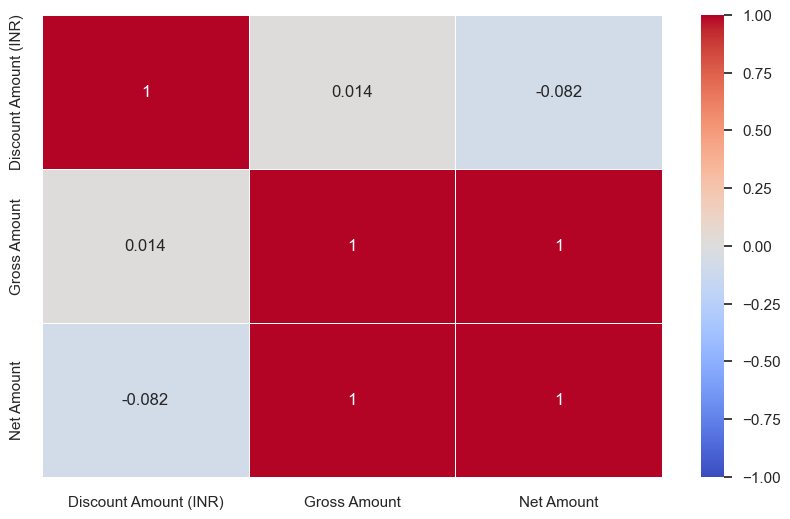

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=0.5, cmap="coolwarm", vmin=-1, vmax=1)

    Gross and net are highly correlated as expected
    Discount is very low correlated to gross and net ammounts

### 4.1.2. Customer Correlation

<Axes: >

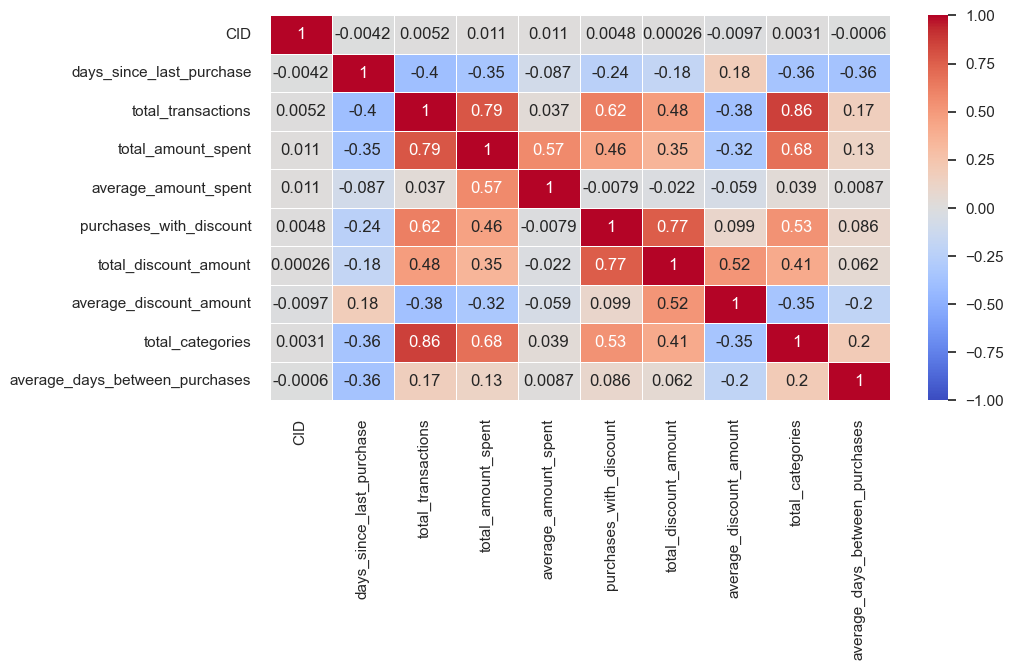

In [36]:
plt.figure(figsize=(10, 5))
sns.heatmap(customer_data.corr(numeric_only=True), annot=True, linewidths=0.5, cmap="coolwarm", vmin=-1, vmax=1)

    Total categories are highly correlated with total transactions, which means that usually, customers shop from different categories
    Total transactions are highly correlated with the total amount spent
    Average discount and total discount are also highly correlated
    The total amount spent and total categories are highly correlated


## 4.2. Pairplot

### 4.2.1. Purchases pairplot

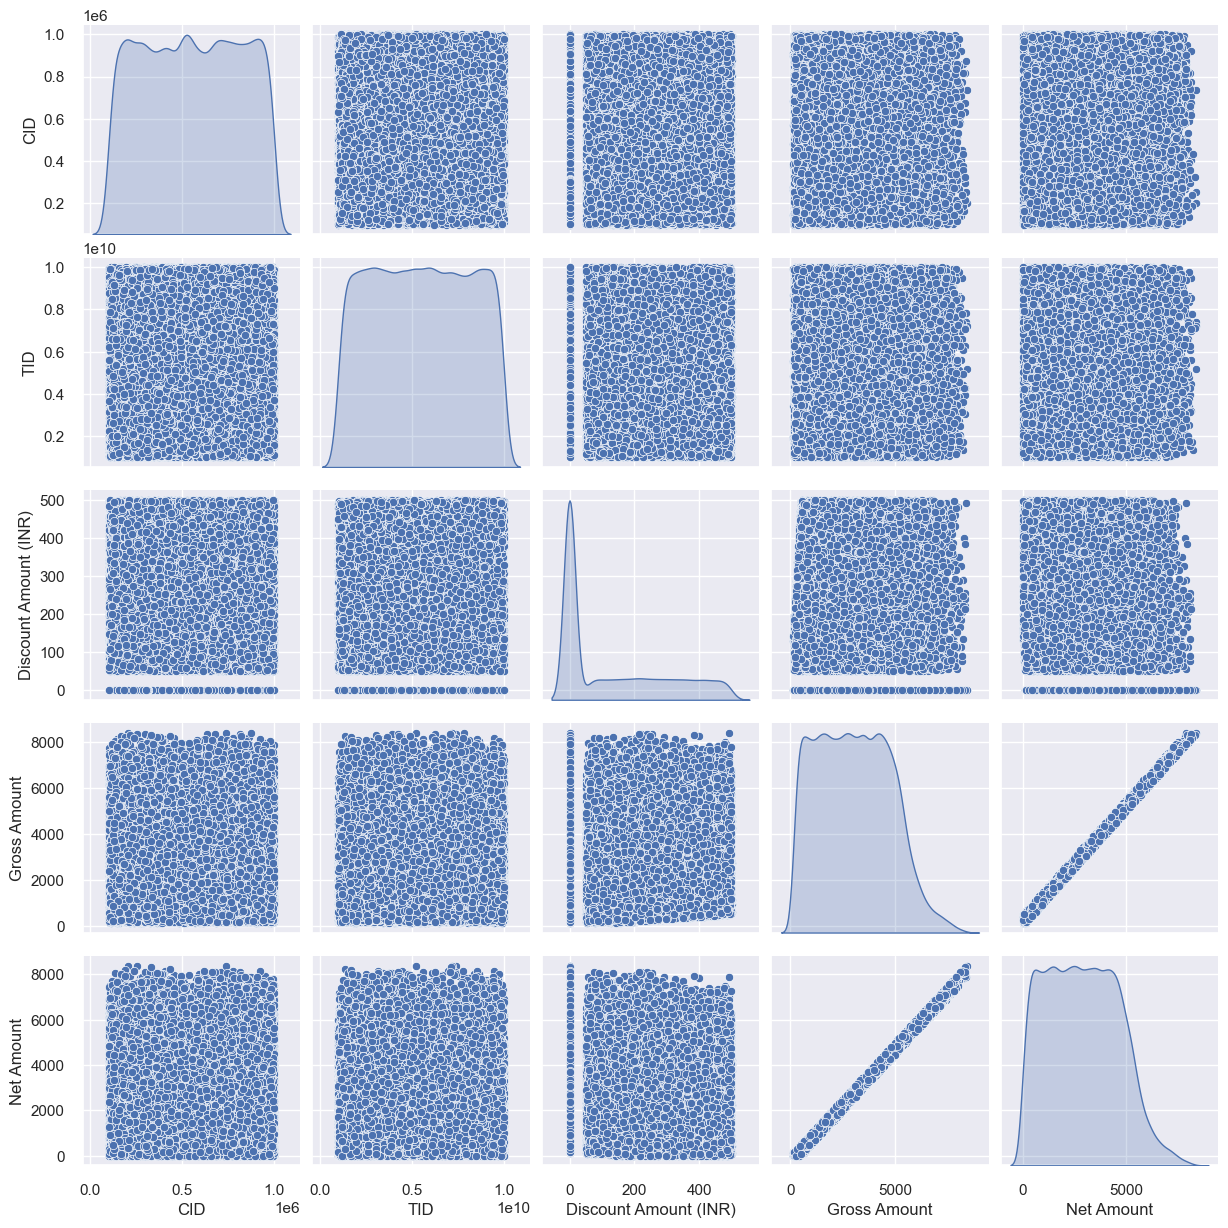

In [37]:
sns.pairplot(df, diag_kind="kde");

    Gross and Net amounts are highly correlated with a linear relationship
    For discount amount, we can identify 2 different groups, purchases with 0 discount and purchases with discount.


### 4.2.2 Customer data pairplot

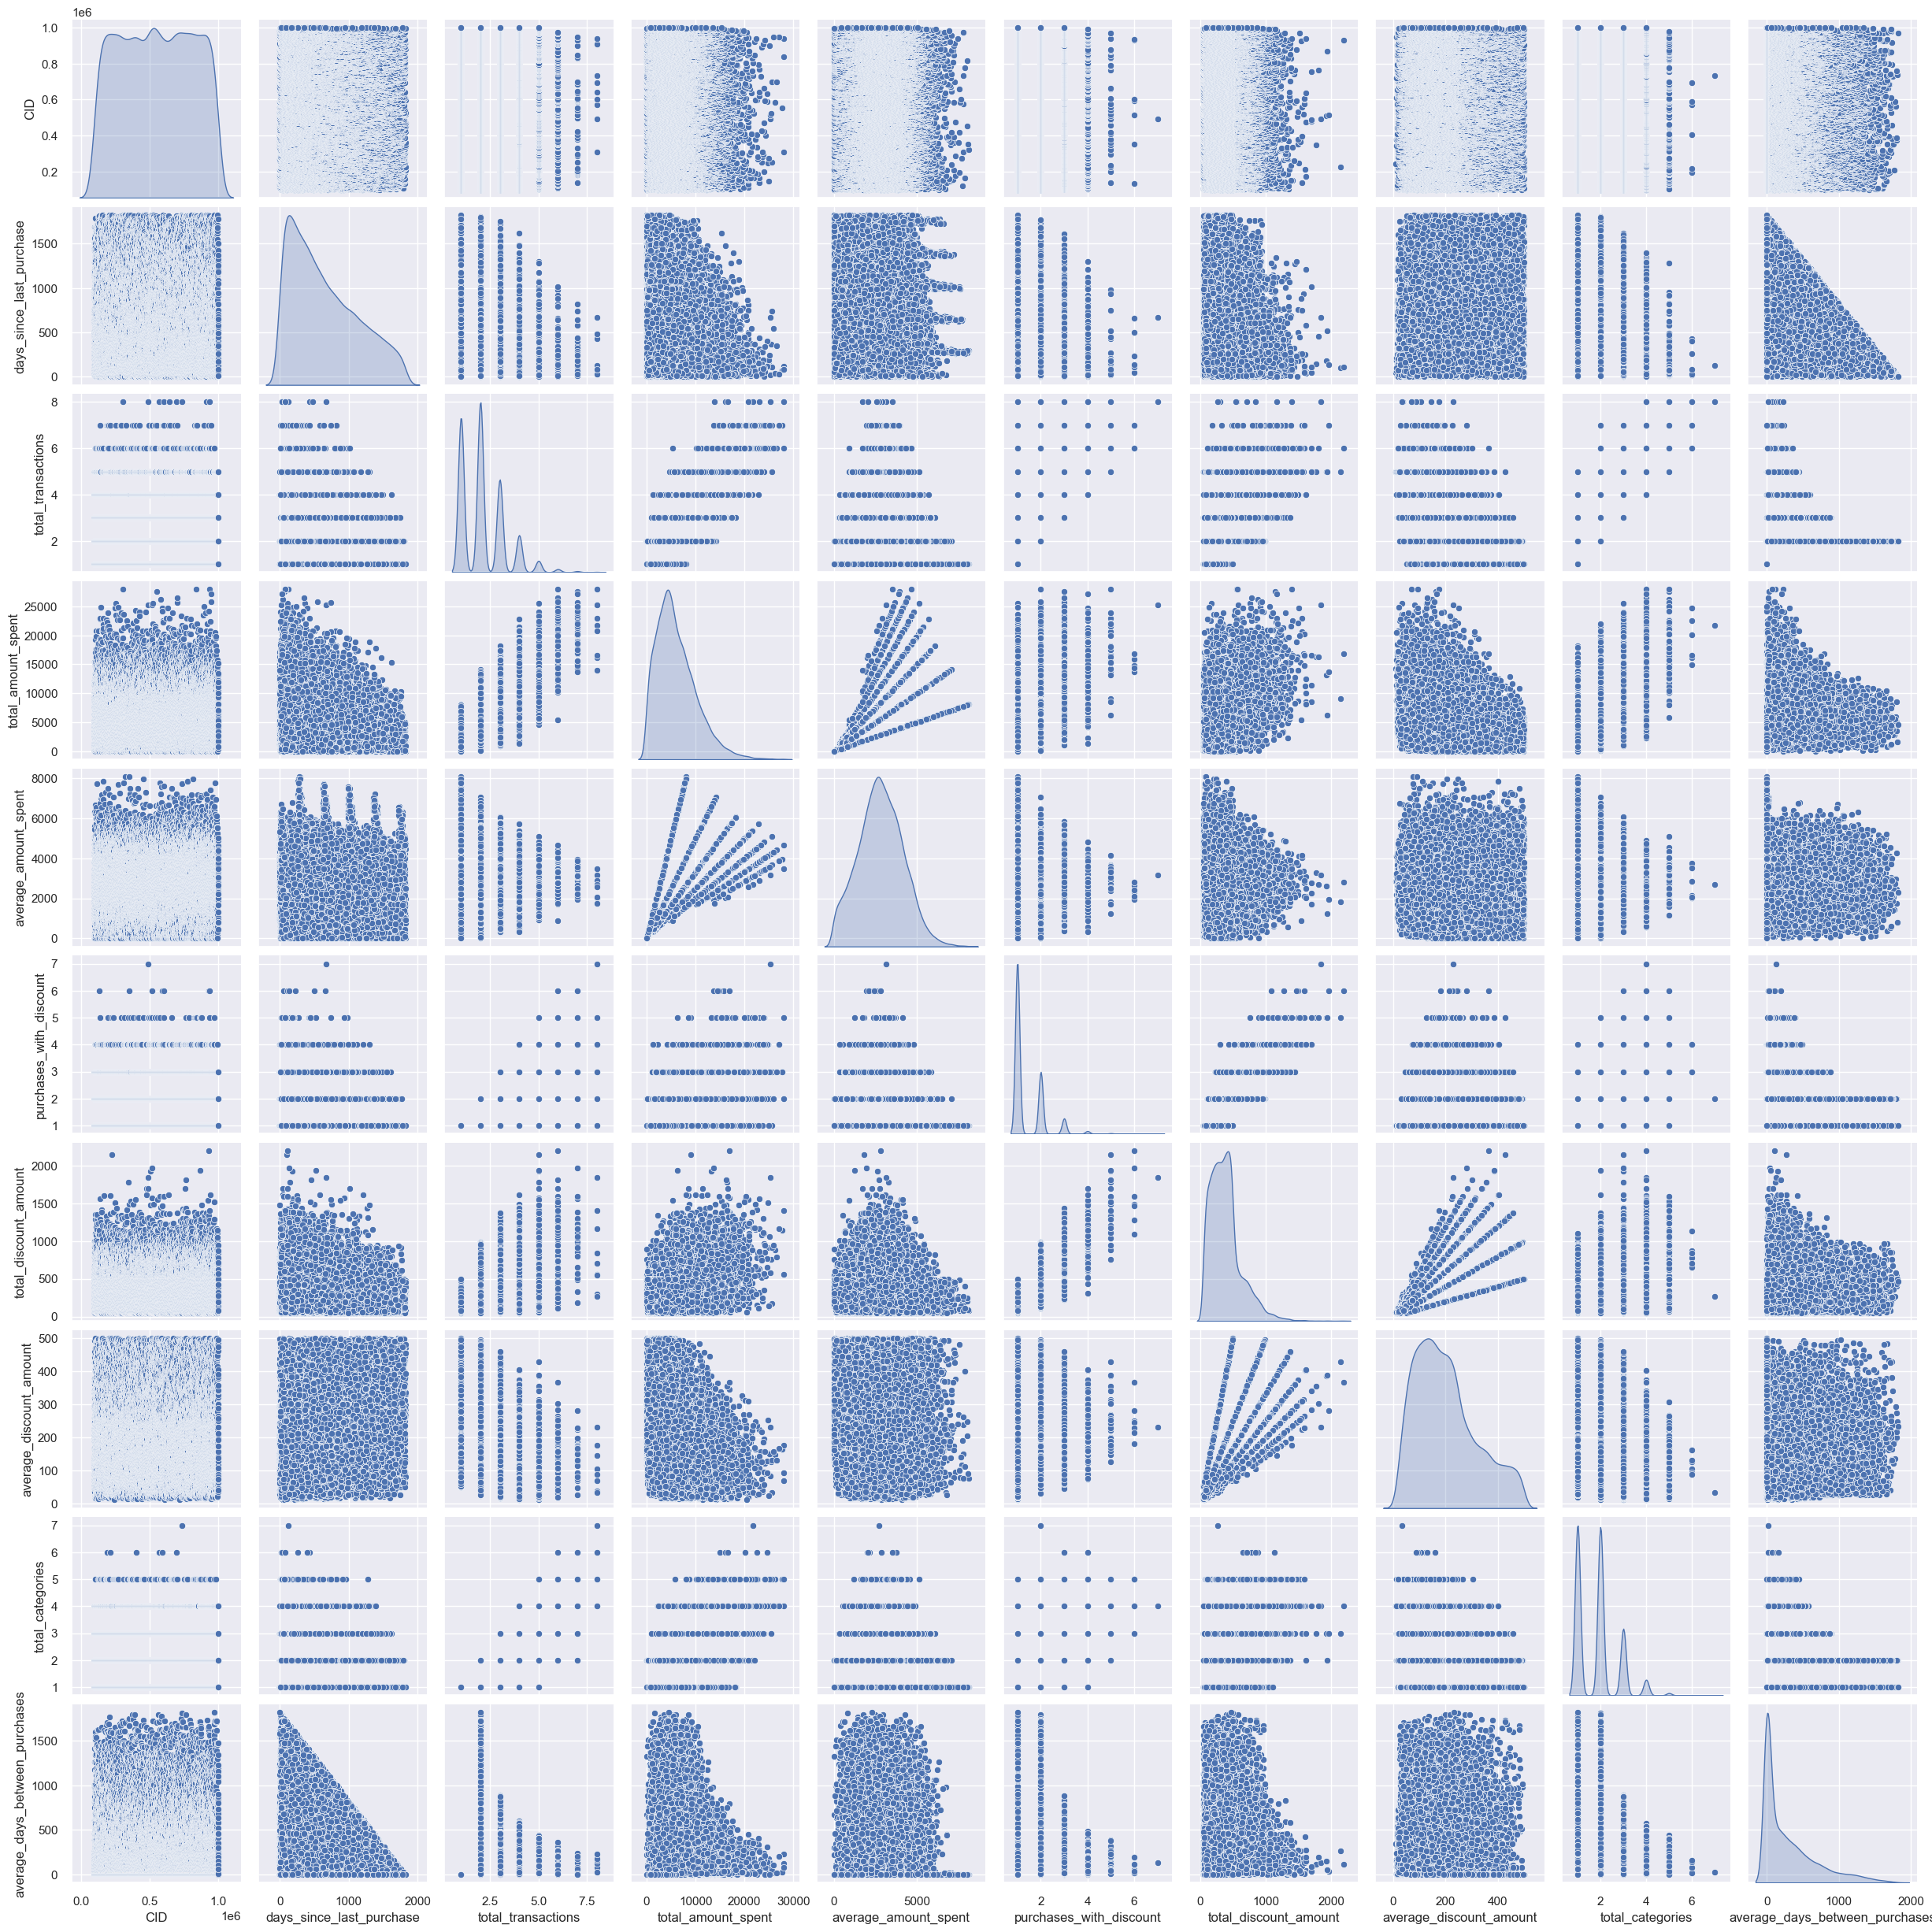

In [38]:
sns.pairplot(customer_data, diag_kind="kde");

    People with more transactions tend to buy more often
    We can appreciate linear relation between total_amount and average_amount, and between total_discount and average_discount

## 4.3 Categorical variables

In [39]:
# funtction to plot countplot
def plot_countplot(data, x, size, title=None):
    total = float(len(data))
    if size is None:
        plt.figure()
    else:
        plt.figure(figsize=size)
    ax = sns.countplot(data, x=x)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3, f"{height / total:.2%}\n({height})", ha="center")
    plt.title(title)
    plt.show()

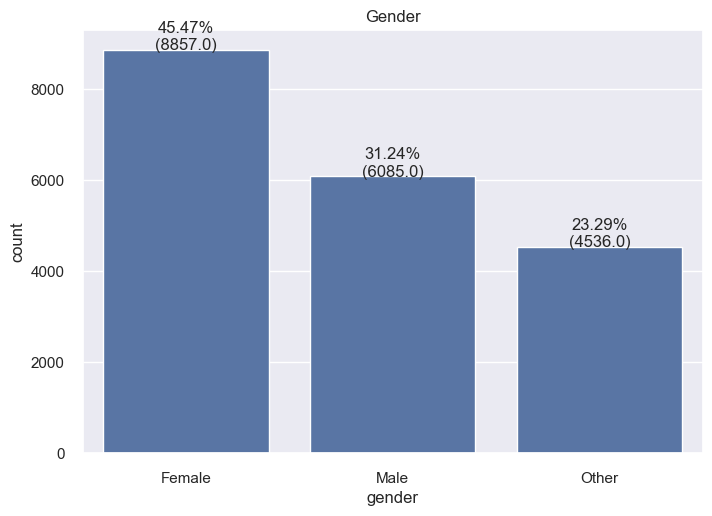

In [40]:
plot_countplot(customer_data, 'gender', None, 'Gender')

    Most of the customers are female

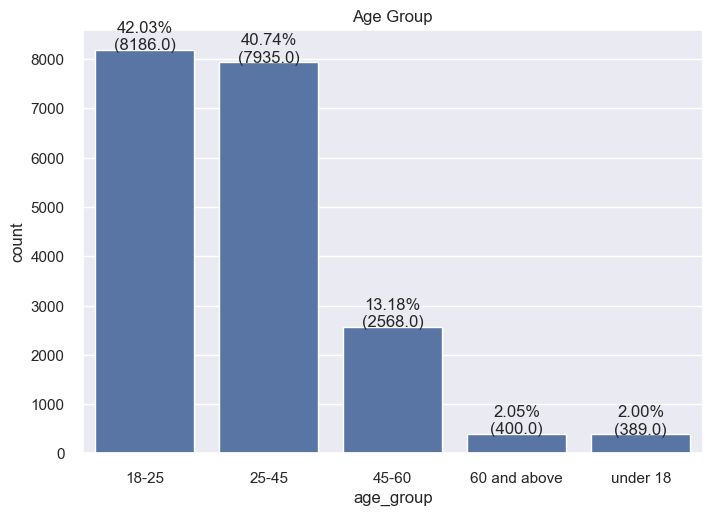

In [41]:
plot_countplot(customer_data, "age_group", None, "Age Group")

    ~ 80% of customers in ages between 18-45
    Very few customers in ages above 60 and under 18

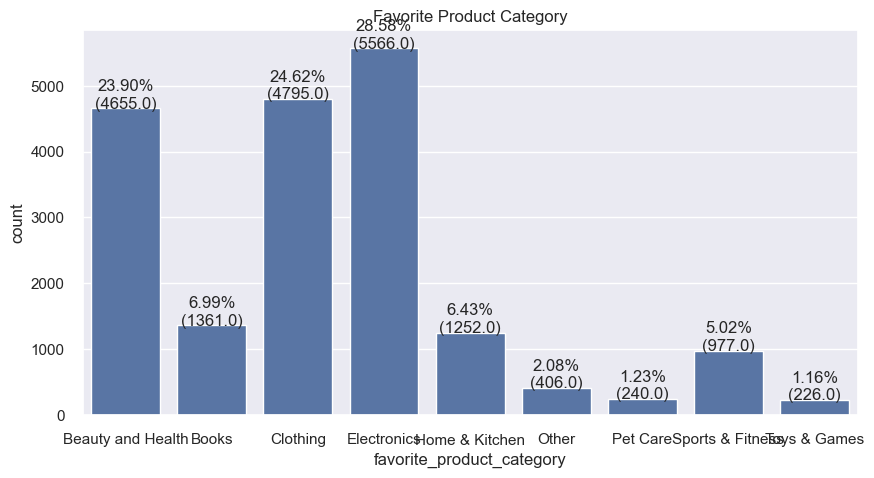

In [42]:
plot_countplot(customer_data, "favorite_product_category", (10, 5), "Favorite Product Category")

    The most popular categories are Electronics, Clothing, and Beauty and Health (~ 75%)
    Pet care and toys & Games have a very few amount

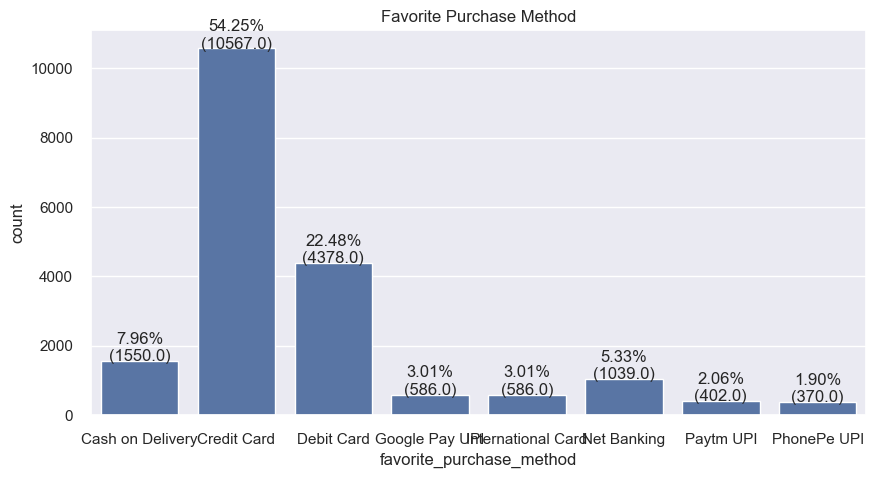

In [43]:
plot_countplot(customer_data, "favorite_purchase_method", (10, 5), "Favorite Purchase Method")

    Most of the payments are made using credit cards (~74%)
    The second most popular payment method is debit card

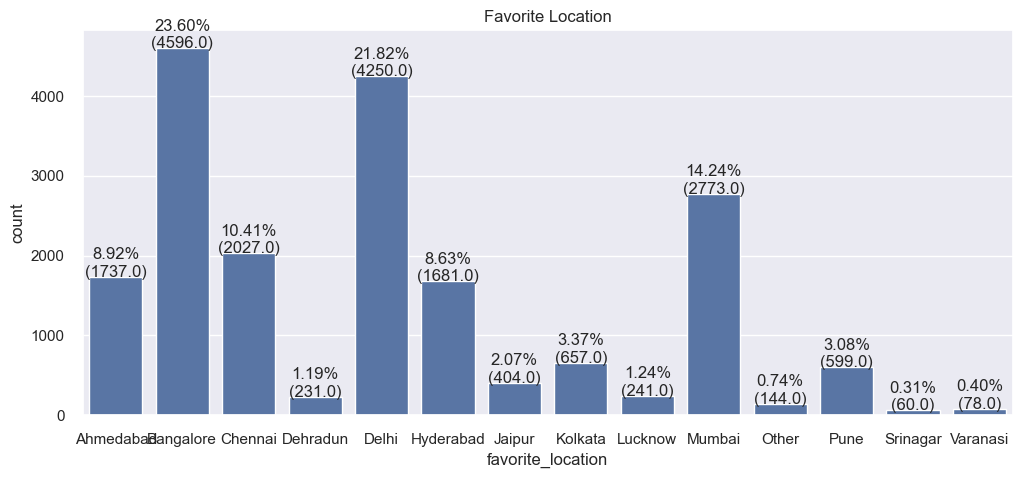

In [44]:
plot_countplot(customer_data, "favorite_location", (12, 5), "Favorite Location")

    Of the 29071 customers, ~ 57% are from Bangalore, Delhi, and Mumbai
    Dehradun, Srinagar, Varanasi, and Other have under 1% of customers each

# 5. Data Preparation


## 5.1. Set CID as index

In [45]:
customer_data.set_index("CID", inplace=True)

## 5.2. One hot encode for categorical

In [46]:
# Getting Dummies for the categorical variables.
customer_data_ohe = pd.get_dummies(customer_data, drop_first=True, dtype=np.uint8)
# dummy_data["Mortgage"] = np.log(dummy_data["Mortgage"] + 1)
display(customer_data_ohe.head())
customer_data_ohe.info()

days_since_last_purchase  total_transactions  total_amount_spent  \
CID                                                                        
100009                       287                   1             6310.82   
100037                       876                   1             3147.99   
100089                       262                   4            12219.74   
100205                       701                   4             7696.69   
100258                        98                   3             8608.02   

        average_amount_spent  purchases_with_discount  total_discount_amount  \
CID                                                                            
100009             6310.8200                        1                 343.46   
100037             3147.9900                        1                 425.15   
100089             3054.9350                        2                 453.00   
100205             1924.1725                        2                 499.37   
100258             2869.3400                        2                 499.24   

        average_discount_amount  total_categories  \
CID                                                 
100009               343.460000                 1   
100037               425.150000                 1   
100089               113.250000                 4   
100205               124.842500                 4   
100258               166.413333                 3   

        average_days_between_purchases  gender_Male  gender_Other  \
CID                                                                 
100009                        0.000000            0             0   
100037                        0.000000            1             0   
100089                       83.000000            0             1   
100205                      176.666667            0             0   
100258                      608.000000            0             1   

        age_group_25-45  age_group_45-60  age_group_60 and above  \
CID                                                                
100009                1                0                       0   
100037                0                0                       0   
100089                0                0                       0   
100205                1                0                       0   
100258                1                0                       0   

        age_group_under 18  favorite_product_category_Books  \
CID                                                           
100009                   0                                0   
100037                   0                                0   
100089                   0                                0   
100205                   0                                0   
100258                   0                                0   

        favorite_product_category_Clothing  \
CID                                          
100009                                   0   
100037                                   0   
100089                                   0   
100205                                   0   
100258                                   1   

        favorite_product_category_Electronics  \
CID                                             
100009                                      1   
100037                                      1   
100089                                      0   
100205                                      0   
100258                                      0   

        favorite_product_category_Home & Kitchen  \
CID                                                
100009                                         0   
100037                                         0   
100089                                         0   
100205                                         0   
100258                                         0   

        favorite_product_category_Other  favorite_product_category_Pet Care  \
CID                         

<class 'pandas.core.frame.DataFrame'>
Index: 19478 entries, 100009 to 999996
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   days_since_last_purchase                     19478 non-null  int64  
 1   total_transactions                           19478 non-null  int64  
 2   total_amount_spent                           19478 non-null  float64
 3   average_amount_spent                         19478 non-null  float64
 4   purchases_with_discount                      19478 non-null  int64  
 5   total_discount_amount                        19478 non-null  float64
 6   average_discount_amount                      19478 non-null  float64
 7   total_categories                             19478 non-null  int64  
 8   average_days_between_purchases               19478 non-null  float64
 9   gender_Male                                  19478 non-null  uint8  
 1

## 5.4 PCA 

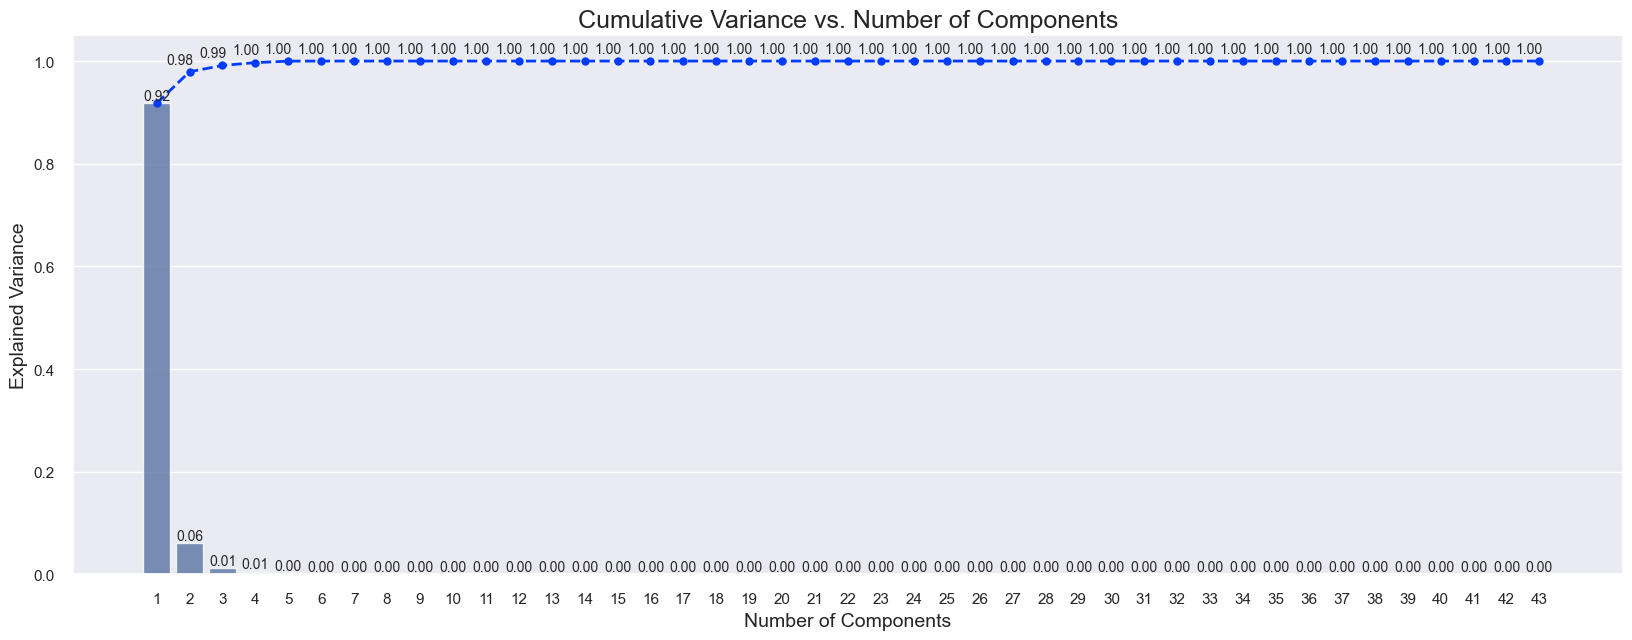

In [47]:
pca = PCA().fit(customer_data_ohe)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(20, 7))
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)
(lineplot,) = plt.plot(
    range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker="o", linestyle="--", color="#003cff", linewidth=2
)

plt.xlabel("Number of Components", fontsize=14)
plt.ylabel("Explained Variance", fontsize=14)
plt.title("Cumulative Variance vs. Number of Components", fontsize=18)

x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)


plt.show()

    We chose 3 as the number of components, as this explains .99 of the variance

In [48]:
customer_data_pca = PCA(n_components=3).fit_transform(customer_data_ohe)
customer_data_pca = pd.DataFrame(customer_data_pca, columns=["PC" + str(i + 1) for i in range(3)])
customer_data_pca.index = customer_data_ohe.index
customer_data_pca.head()

PC1          PC2         PC3
CID                                         
100009   964.712058  3350.665445 -442.421111
100037 -2778.402804   917.955536  150.145047
100089  6116.099049  -965.410541  111.787897
100205  1448.167445 -1173.823931  274.310040
100258  2555.517855  -494.327297 -486.139511

# 6. K-Means Modeling

## 6.1. Determine Number of Clusters

    Lets use Elbow Method

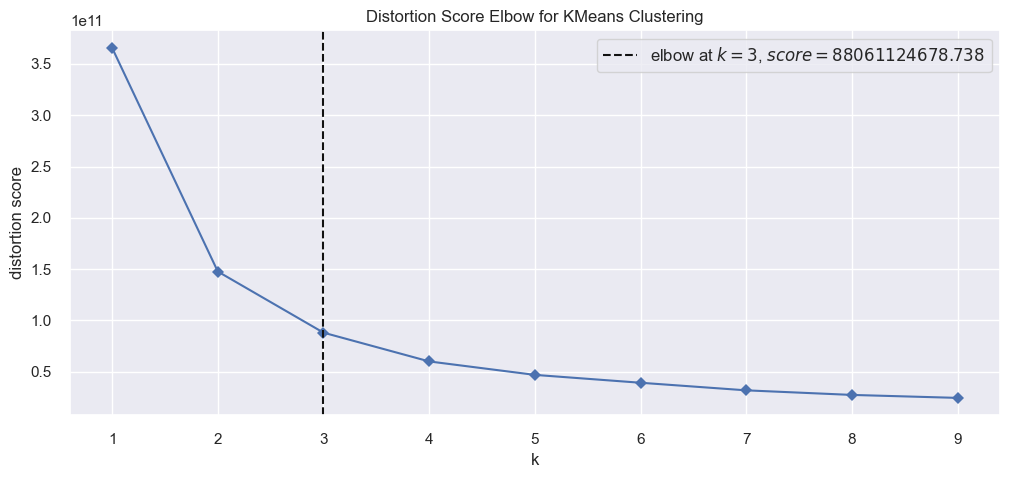

In [49]:
km = KMeans(init="k-means++", n_init=10, max_iter=100, random_state=0)

fig, ax = plt.subplots(figsize=(12, 5))
visualizer = KElbowVisualizer(km, k=(1, 10), timings=False, ax=ax)
visualizer.fit(customer_data_pca)
visualizer.show();

    The elbow method suggest an optimal number of clusters of 3

## 6.2 KMeans Clustering model

In [50]:
km = KMeans(init="k-means++", n_init=10, max_iter=100, random_state=0, n_clusters=3)
km.fit(customer_data_pca)

# Append the cluster labels to the original dataframes
customer_data["cluster"] = km.labels_
customer_data_ohe["cluster"] = km.labels_
customer_data_pca["cluster"] = km.labels_
customer_data.head()

days_since_last_purchase  gender age_group  total_transactions  \
CID                                                                      
100009                       287  Female     25-45                   1   
100037                       876    Male     18-25                   1   
100089                       262   Other     18-25                   4   
100205                       701  Female     25-45                   4   
100258                        98   Other     25-45                   3   

        total_amount_spent  average_amount_spent  purchases_with_discount  \
CID                                                                         
100009             6310.82             6310.8200                        1   
100037             3147.99             3147.9900                        1   
100089            12219.74             3054.9350                        2   
100205             7696.69             1924.1725                        2   
100258             8608.02             2869.3400                        2   

        total_discount_amount  average_discount_amount  total_categories  \
CID                                                                        
100009                 343.46               343.460000                 1   
100037                 425.15               425.150000                 1   
100089                 453.00               113.250000                 4   
100205                 499.37               124.842500                 4   
100258                 499.24               166.413333                 3   

       favorite_product_category  average_days_between_purchases  \
CID                                                                
100009               Electronics                        0.000000   
100037               Electronics                        0.000000   
100089         Beauty and Health                       83.000000   
100205         Beauty and Health                      176.666667   
100258                  Clothing                      608.000000   

       favorite_purchase_method favorite_location  cluster  
CID                                                         
100009              Credit Card             Delhi        0  
100037              Credit Card         Hyderabad        2  
100089              Credit Card            Mumbai        1  
100205         Cash on Delivery         Ahmedabad        0  
100258              Credit Card           Chennai        0

## 6.3. Cluster Analysis

### 6.3.1. Distribution

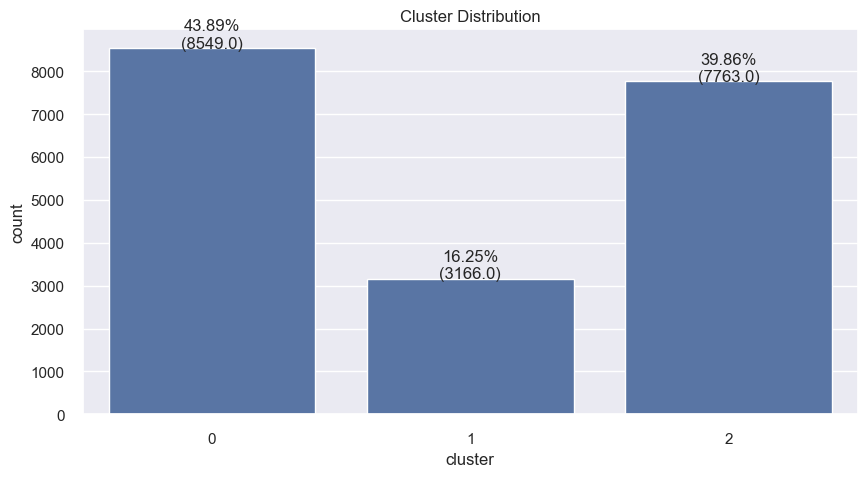

In [51]:
plot_countplot(customer_data, "cluster", (10, 5), "Cluster Distribution")

    Clusters 0 and 2 have a balanced amount of customers
    Cluster 1 has the least customers (4638)

### 6.3.2. Cluster profiles

In [52]:
# print statistics for each cluster
print("Cluster 0")
display(customer_data[customer_data["cluster"] == 0].describe().T)
print("Cluster 1")
display(customer_data[customer_data["cluster"] == 1].describe().T)
print("Cluster 2")
display(customer_data[customer_data["cluster"] == 2].describe().T)

Cluster 0


count         mean          std          min  \
days_since_last_purchase        8549.0   596.552111   441.318714     0.000000   
total_transactions              8549.0     2.201427     0.839420     1.000000   
total_amount_spent              8549.0  6712.037189  1587.286547  4017.820000   
average_amount_spent            8549.0  3375.940286  1101.009197   897.986667   
purchases_with_discount         8549.0     1.417593     0.623513     1.000000   
total_discount_amount           8549.0   382.465446   231.075577    50.090000   
average_discount_amount         8549.0   186.150398   107.362983    13.207500   
total_categories                8549.0     1.917768     0.729035     1.000000   
average_days_between_purchases  8549.0   386.477711   393.049654     0.000000   
cluster                         8549.0     0.000000     0.000000     0.000000   

                                     25%          50%      75%      max  
days_since_last_purchase         232.000   501.000000   895.00  1825.00  
total_transactions                 2.000     2.000000     3.00     6.00  
total_amount_spent              5345.300  6547.610000  7980.44  9956.45  
average_amount_spent            2545.505  3128.943333  4183.22  8097.20  
purchases_with_discount            1.000     1.000000     2.00     5.00  
total_discount_amount            209.340   355.590000   486.14  2144.86  
average_discount_amount          102.675   169.975000   244.11   499.71  
total_categories                   1.000     2.000000     2.00     5.00  
average_days_between_purchases    47.000   274.000000   598.00  1799.00  
cluster                            0.000     0.000000     0.00     0.00

Cluster 1


count          mean          std  \
days_since_last_purchase        3166.0    385.468099   311.466631   
total_transactions              3166.0      3.642135     1.059902   
total_amount_spent              3166.0  13096.474912  2957.425130   
average_amount_spent            3166.0   3765.268475   877.124333   
purchases_with_discount         3166.0      1.964624     0.950603   
total_discount_amount           3166.0    535.171649   309.945559   
average_discount_amount         3166.0    149.337923    78.925039   
total_categories                3166.0      2.847126     0.871528   
average_days_between_purchases  3166.0    279.055559   250.433437   
cluster                         3166.0      1.000000     0.000000   

                                        min           25%         50%  \
days_since_last_purchase           0.000000    140.000000    307.0000   
total_transactions                 2.000000      3.000000      3.0000   
total_amount_spent              9826.310000  10894.320000  12241.7050   
average_amount_spent            1700.631667   3191.727375   3653.7100   
purchases_with_discount            1.000000      1.000000      2.0000   
total_discount_amount             50.680000    303.812500    479.7800   
average_discount_amount           10.868000     88.889583    142.4575   
total_categories                   1.000000      2.000000      3.0000   
average_days_between_purchases     0.000000     96.000000    213.7500   
cluster                            1.000000      1.000000      1.0000   

                                         75%        max  
days_since_last_purchase          571.750000   1760.000  
total_transactions                  4.000000      8.000  
total_amount_spent              14415.855000  27966.340  
average_amount_spent             4210.005833   7068.925  
purchases_with_discount             3.000000      7.000  
total_discount_amount             724.000000   2195.370  
average_discount_amount           199.119375    481.635  
total_categories                    3.000000      7.000  
average_days_between_purchases    390.562500   1661.000  
cluster                             1.000000      1.000

Cluster 2


count         mean          std      min  \
days_since_last_purchase        7763.0   821.256859   523.479049   0.0000   
total_transactions              7763.0     1.445962     0.616914   1.0000   
total_amount_spent              7763.0  2422.972029  1295.232631   0.0000   
average_amount_spent            7763.0  1783.638903  1026.171580   0.0000   
purchases_with_discount         7763.0     1.169136     0.405280   1.0000   
total_discount_amount           7763.0   322.405843   177.763813  50.0100   
average_discount_amount         7763.0   241.459791   126.841281  16.5525   
total_categories                7763.0     1.356306     0.546057   1.0000   
average_days_between_purchases  7763.0   215.066823   375.528855   0.0000   
cluster                         7763.0     2.000000     0.000000   2.0000   

                                        25%       50%        75%      max  
days_since_last_purchase         362.000000   788.000  1259.0000  1826.00  
total_transactions                 1.000000     1.000     2.0000     5.00  
total_amount_spent              1366.460000  2529.300  3521.2100  4977.71  
average_amount_spent            1026.396667  1696.270  2363.3550  4063.84  
purchases_with_discount            1.000000     1.000     1.0000     4.00  
total_discount_amount            185.290000   308.230   430.7400  1341.79  
average_discount_amount          136.755000   225.295   342.2675   499.58  
total_categories                   1.000000     1.000     2.0000     4.00  
average_days_between_purchases     0.000000     0.000   310.0000  1819.00  
cluster                            2.000000     2.000     2.0000     2.00

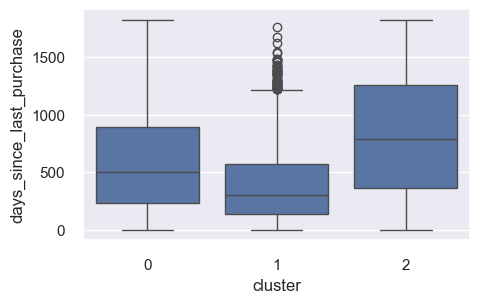

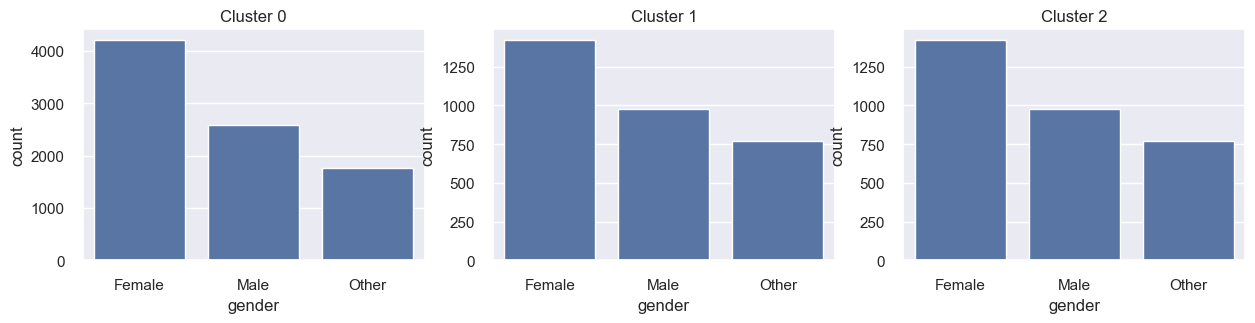

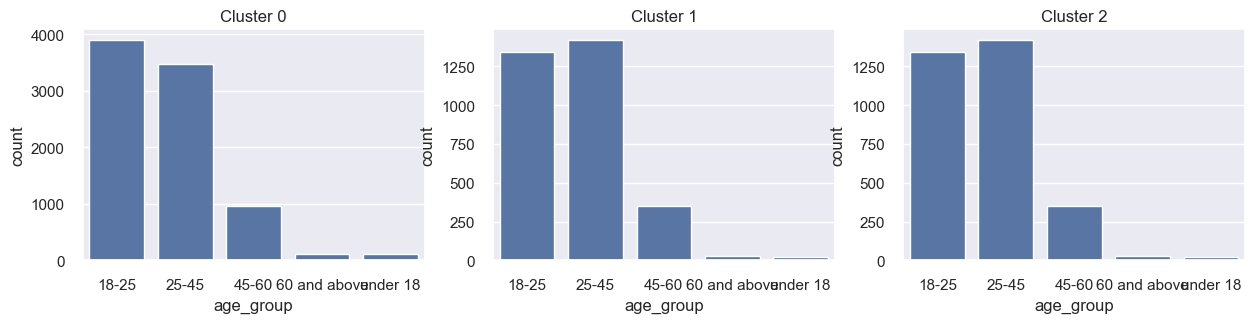

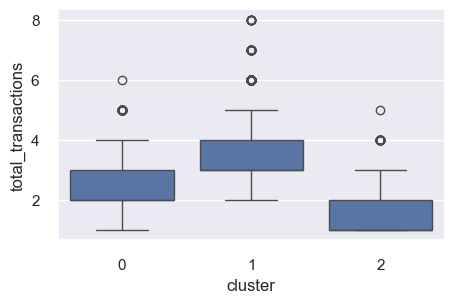

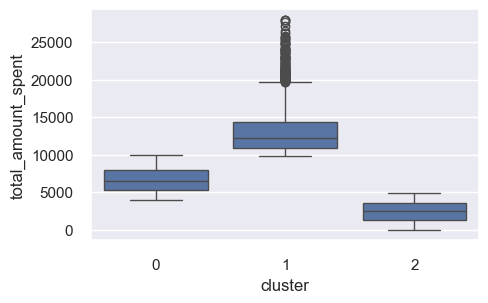

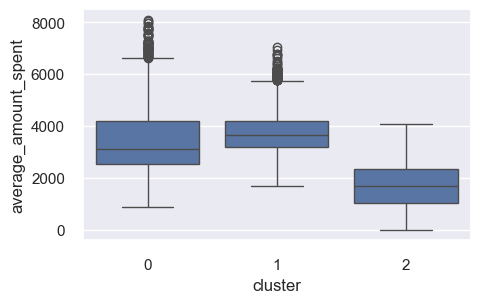

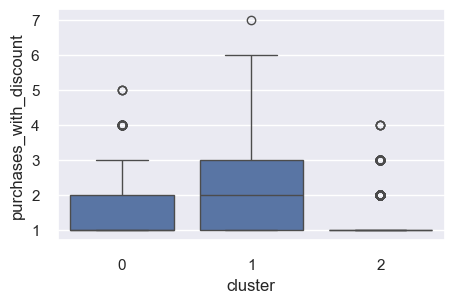

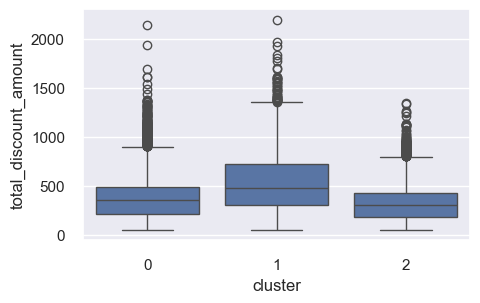

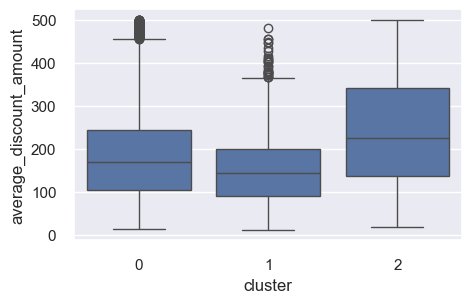

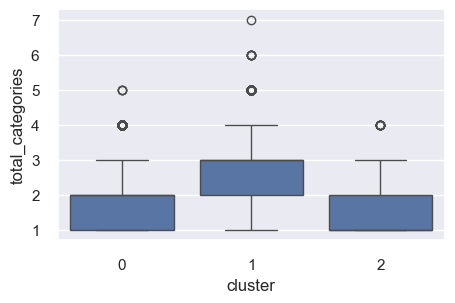

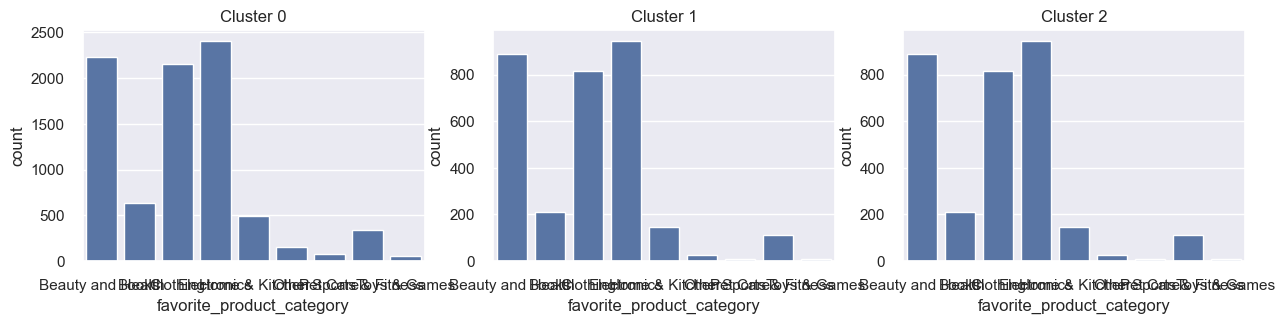

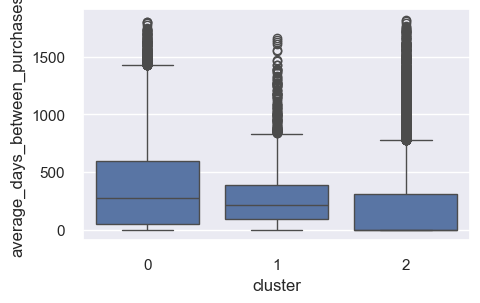

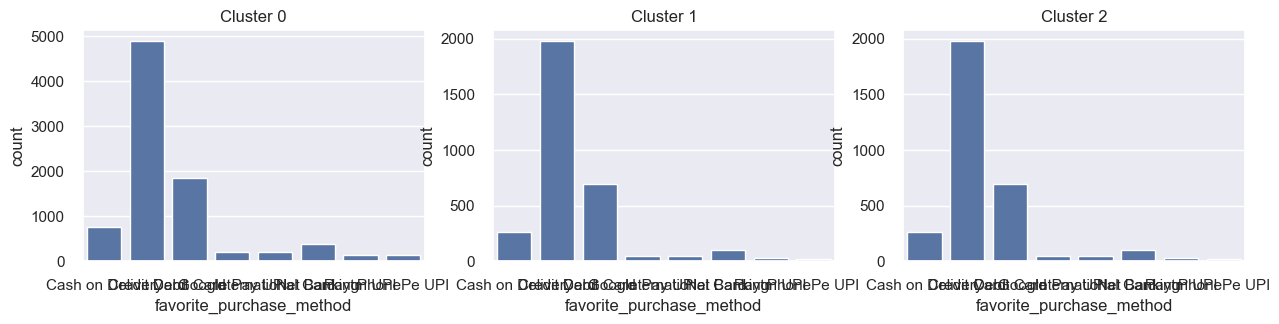

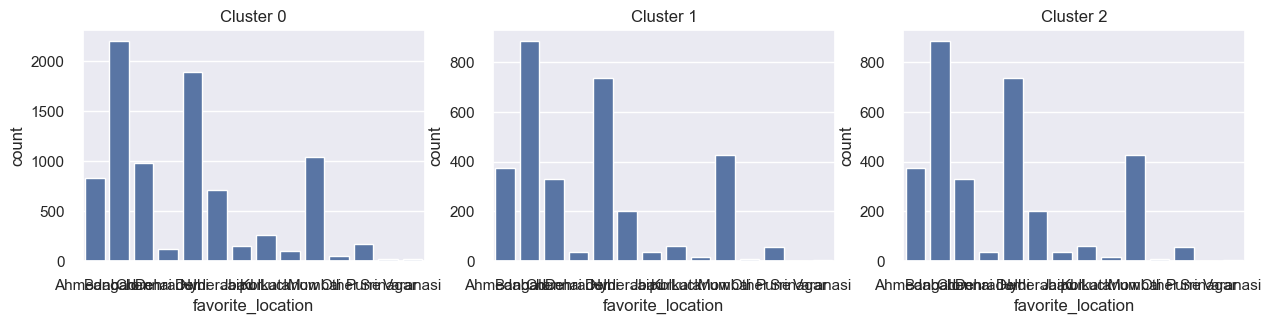

In [53]:
for column in customer_data.columns:
    if column == "cluster":
        continue

    typec = type(customer_data[column].iloc[0])
    if typec == str:
        fig, ax = plt.subplots(1, 3, figsize=(15, 3))
        sns.countplot(customer_data[customer_data['cluster'] == 0], x=column, ax=ax[0])
        sns.countplot(customer_data[customer_data["cluster"] == 1], x=column, ax=ax[1])
        sns.countplot(customer_data[customer_data["cluster"] == 1], x=column, ax=ax[2])
        ax[0].set_title("Cluster 0")
        ax[1].set_title("Cluster 1")
        ax[2].set_title("Cluster 2")
    else:
        plt.figure(figsize=(5, 3))
        sns.boxplot(customer_data, y=column, x="cluster")
    plt.show()

    The 3 clusters have similar distribution for gender, age group. favorite product category, favorite purchase method, and purchase location.
    Cluster 0 - Casual buyers:
      Customers that buys more than once
      All age ranges
      Total spend between 4000 and 9000
      They spend between 2500 to 5000 per purchase
      days between purchases is under 1000 days
    Cluster 1 - Recurrent buyers:
      Customers with many purchases
      Age range from 18 to 60 years old
      They have a total spend over 10000
      Most of the purchases are with discount
      They spend between 2500 to 5000 per purchase
      Time between purchases is under 500 days
    Cluster 3 - One time buyers:
      Customers that are one or two time buyers.
      All age ranges
      buy items from all of the categories
      Spend under 4000 in total
      Spend under 3500 per purchase
      Buys with the highest discount amount
      Buys from one or two product categories

# 7. Recommender system

    Lets use Matrix factorization to build a recommender system

## 7.1. Prepare the data

    Given that the amount spent was the most differentiated in the clustering, we will create the matrix in the following order
      p_cat_1_0 -> count of purchases was more than 0 but less than 2500
      p_cat_1_2500 -> count of purchases was more than 2500 but less than 3200
      p_cat_1_3200 -> count of purchases was more than 3200
    In this way, our recommender system can recommend a category and a price range from that category

   The matrix will looks like this
   
      CID  p_cat_1_0 p_cat_1_2500  p_cat_1_3200  p_cat_2_0  ...
      1        1        0             0             0       ...
      2        0        2             0             0       ...
      3        3        1             0             0       ...
      ..      ...      ...           ...           ...      ...

In [54]:
# duplicate df
df_temp = df.copy()
# set datatype for  df_temp["Product Category"] to string
df_temp["Product Category"] = df_temp["Product Category"].astype(str)
# updtade product category adding _0 if net ammount is under 2500
df_temp["Product Category"] = np.where(df_temp["Net Amount"] < 2500, df_temp["Product Category"] + "_0", df_temp["Product Category"])
df_temp["Product Category"] = np.where(
    (df_temp["Net Amount"] >= 2500) & (df_temp["Net Amount"] < 3200), df_temp["Product Category"] + "_2500", df_temp["Product Category"]
)
df_temp["Product Category"] = np.where(
    (df_temp["Net Amount"] >= 3200), df_temp["Product Category"] + "_3200", df_temp["Product Category"]
)

matrix = df_temp.pivot_table(index="CID", columns="Product Category", values="Net Amount", aggfunc="count", fill_value=0)
# replace values over 0 and under 2500 with 1
matrix[(matrix > 0) & (matrix<2500)] = 1
# replace values over 2500 and under 3200 with 2
matrix[(matrix >= 2500) & (matrix < 3200)] = 2
# replace values over 3200 with 3
matrix[matrix >= 3200] = 3


# convert matrix to integer
matrix = matrix.astype(int)
# print the matrix
matrix.head()

Product Category  Beauty and Health_0  Beauty and Health_2500  \
CID                                                             
100009                              0                       0   
100037                              0                       0   
100063                              0                       0   
100089                              0                       0   
100096                              0                       0   

Product Category  Beauty and Health_3200  Books_0  Books_2500  Books_3200  \
CID                                                                         
100009                                 0        0           0           0   
100037                                 0        0           0           0   
100063                                 0        1           0           0   
100089                                 1        0           0           0   
100096                                 0        0           0           0   

Product Category  Clothing_0  Clothing_2500  Clothing_3200  Electronics_0  \
CID                                                                         
100009                     0              0              0              0   
100037                     0              0              0              0   
100063                     0              0              0              0   
100089                     0              0              0              1   
100096                     0              0              0              0   

Product Category  Electronics_2500  Electronics_3200  Home & Kitchen_0  \
CID                                                                      
100009                           0                 1                 0   
100037                           1                 0                 0   
100063                           0                 0                 0   
100089                           0                 0                 0   
100096                           0                 0                 0   

Product Category  Home & Kitchen_2500  Home & Kitchen_3200  Other_0  \
CID                                                                   
100009                              0                    0        0   
100037                              0                    0        0   
100063                              0                    0        0   
100089                              0                    1        1   
100096                              0                    0        0   

Product Category  Other_2500  Other_3200  Pet Care_0  Pet Care_2500  \
CID                                                                   
100009                     0           0           0              0   
100037                     0           0           0              0   
100063                     0           0           0              0   
100089                     0           0           0              0   
100096                     0           0           0              0   

Product Category  Pet Care_3200  Sports & Fitness_0  Sports & Fitness_2500  \
CID                                                                          
100009                        0                   0                      0   
100037                        0                   0                      0   
100063                        0                   0                      0   
100089                        0                   0                      0   
100096                        1                   0                      0   

Product Category  Sports & Fitness_3200  Toys & Games_0  Toys & Games_2500  \
CID                                                                          
100009                                0               0                  0   
100037                                0               0                  0   
100063                                0               0                  0   
100089      

## 7.3 Build matrix factorization model

In [55]:
from sklearn.decomposition import NMF

# Create an NMF model
nmf = NMF(n_components=10, init="random", random_state=0)
W = nmf.fit_transform(matrix)
H = nmf.components_
V = W @ H


## 7.5 Calculate RMSE

In [56]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(matrix, V)
print("RMSE:", rmse)

RMSE: 0.10788207134618165


    we got a RMSE of 0.1079

# 7.6. Hyperparameter tuning

In [57]:
# lets try different parameters
best_model = None
best_rmse = 999.0

for i in range(1, 40):
    try:
        nmf = NMF(n_components=i, init="random", random_state=0)
        W = nmf.fit_transform(matrix)
        H = nmf.components_
        V = W @ H
        RMSE = root_mean_squared_error(matrix, V)
        if RMSE < best_rmse:
            best_rmse = RMSE
            best_model = W
            print("Best RSME so far: ", RMSE, "n_components:", i)
    except Exception as e:
        continue

Best RSME so far:  0.2168273984544131 n_components: 1
Best RSME so far:  0.20211507943063522 n_components: 2
Best RSME so far:  0.18787689407365077 n_components: 3
Best RSME so far:  0.17421905825865078 n_components: 4
Best RSME so far:  0.16209494214953132 n_components: 5
Best RSME so far:  0.14797761287088693 n_components: 6
Best RSME so far:  0.137406625599683 n_components: 7
Best RSME so far:  0.1309429237823241 n_components: 8
Best RSME so far:  0.11883297609958395 n_components: 9
Best RSME so far:  0.10788207134618165 n_components: 10
Best RSME so far:  0.09445696146083804 n_components: 11
Best RSME so far:  0.08620328235067205 n_components: 12
Best RSME so far:  0.07928958461533257 n_components: 13
Best RSME so far:  0.07132522465338667 n_components: 14
Best RSME so far:  0.06441358406793622 n_components: 15
Best RSME so far:  0.05844276395140894 n_components: 16
Best RSME so far:  0.050453159397099635 n_components: 17
Best RSME so far:  0.04533619610302071 n_components: 18
Best

    The best parameters are n_components: 34
    RMSE: 5.0282295472848175e-06

## 7.7. Build optimal model

In [58]:
# rebuild the best model
nmf = NMF(n_components=34, init="random", random_state=0)
W_optimal = nmf.fit_transform(matrix)
H_optimal = nmf.components_
V_optimal = pd.DataFrame(W_optimal @ H_optimal, columns=matrix.columns)
V_optimal.index = matrix.index
V_optimal

Product Category  Beauty and Health_0  Beauty and Health_2500  \
CID                                                             
100009                   0.000000e+00            0.000000e+00   
100037                   2.404599e-11            0.000000e+00   
100063                   0.000000e+00            0.000000e+00   
100089                   1.434966e-10            1.235412e-13   
100096                   0.000000e+00            0.000000e+00   
...                               ...                     ...   
999876                   2.933893e-22            1.235412e-13   
999883                   8.970466e-10            0.000000e+00   
999910                   0.000000e+00            0.000000e+00   
999924                   0.000000e+00            0.000000e+00   
999996                   0.000000e+00            0.000000e+00   

Product Category  Beauty and Health_3200       Books_0    Books_2500  \
CID                                                                    
100009                          0.000000  0.000000e+00  0.000000e+00   
100037                          0.000000  0.000000e+00  0.000000e+00   
100063                          0.000000  1.000000e+00  0.000000e+00   
100089                          1.000000  2.872113e-27  8.238349e-14   
100096                          0.000032  0.000000e+00  0.000000e+00   
...                                  ...           ...           ...   
999876                          1.000000  1.290401e-27  8.238349e-14   
999883                          0.000000  0.000000e+00  0.000000e+00   
999910                          0.000000  0.000000e+00  1.000000e+00   
999924                          0.000000  0.000000e+00  0.000000e+00   
999996                          0.000003  1.000000e+00  0.000000e+00   

Product Category    Books_3200    Clothing_0  Clothing_2500  Clothing_3200  \
CID                                                                          
100009            1.334288e-11  0.000000e+00   0.000000e+00   7.435764e-08   
100037            0.000000e+00  0.000000e+00   0.000000e+00   0.000000e+00   
100063            0.000000e+00  0.000000e+00   0.000000e+00   0.000000e+00   
100089            3.185483e-11  9.654683e-09   2.849260e-13   0.000000e+00   
100096            6.281709e-11  0.000000e+00   0.000000e+00   0.000000e+00   
...                        ...           ...            ...            ...   
999876            6.044733e-14  9.654683e-09   2.849260e-13   7.375162e-13   
999883            1.504884e-11  2.951377e-08   0.000000e+00   0.000000e+00   
999910            0.000000e+00  0.000000e+00   0.000000e+00   0.000000e+00   
999924            3.199588e-11  0.000000e+00   1.000000e+00   0.000000e+00   
999996            1.000000e+00  0.000000e+00   0.000000e+00   9.320539e-34   

Product Category  Electronics_0  Electronics_2500  Electronics_3200  \
CID                                                                   
100009             0.000000e+00      0.000000e+00      1.000000e+00   
100037             0.000000e+00      1.000000e+00      0.000000e+00   
100063             0.000000e+00      0.000000e+00      0.000000e+00   
100089             1.000000e+00      2.877394e-11      2.766075e-14   
100096             0.000000e+00      0.000000e+00      7.062256e-11   
...                         ...               ...               ...   
999876             0.000000e+00      0.000000e+00      1.211447e-14   
999883             1.000000e+00      1.798758e-10      1.276449e-18   
999910             0.000000e+00      0.000000e+00      0.000000e+00   
999924             0.000000e+00      0.000000e+00      6.397037e-13   
999996             3.569029e-34      0.000000e+00      9.114352e-38   

Product Category  Home & Kitchen_0  Home & Kitchen_2500  Home & Kitchen_3200  \
CID                                                                            
100009                1.113569e-17         0.000000e+00         0.000000e+00   
100037                2.586357e-17    

      This matrix give us the recommendation for each user, the higher the value the higher the recommendation

## 7.8. Test recommendations for users

In [59]:
# Print the top 3 recommendations for the first 5 users
for i in range(10):
    print(f"Recommendations for user {V_optimal.index[i]}: {V_optimal.iloc[i].sort_values(ascending=False).head(5).index.tolist()}")

Recommendations for user 100009: ['Electronics_3200', 'Clothing_3200', 'Pet Care_2500', 'Toys & Games_0', 'Sports & Fitness_2500']
Recommendations for user 100037: ['Electronics_2500', 'Home & Kitchen_3200', 'Sports & Fitness_2500', 'Beauty and Health_0', 'Home & Kitchen_0']
Recommendations for user 100063: ['Books_0', 'Toys & Games_2500', 'Beauty and Health_0', 'Home & Kitchen_3200', 'Toys & Games_0']
Recommendations for user 100089: ['Home & Kitchen_3200', 'Beauty and Health_3200', 'Electronics_0', 'Other_0', 'Toys & Games_2500']
Recommendations for user 100096: ['Pet Care_3200', 'Beauty and Health_3200', 'Electronics_3200', 'Books_3200', 'Sports & Fitness_2500']
Recommendations for user 100097: ['Clothing_3200', 'Home & Kitchen_3200', 'Beauty and Health_3200', 'Sports & Fitness_2500', 'Books_3200']
Recommendations for user 100139: ['Electronics_3200', 'Clothing_3200', 'Pet Care_2500', 'Toys & Games_0', 'Sports & Fitness_2500']
Recommendations for user 100177: ['Other_3200', 'Home & 

    We can appreciate the top 5 recommendations for the first 10 users.
    the _0, _2500, and _3200 represent the price range that the user is likely to purchase
    When a user logs in into the e-commerce platform we can check this matrix and recommend to the user products in these categories and in the price range.

# 8. Conclusions

    We analyzed the data of an e-commerce platform with 55000 entries (purchases)
    We treated missing values, wrong data types, negative values, and adjusted discounts for proper data analysis and modeling
    We had to transform the data before implementing any model to get meaningful insight into each segment
    We implemented unsupervised models for an e-commerce platform
    We implemented k-means for clustering and identified 3 different segments of users with different preferences and behaviors
      one-time buyers
      casual buyers
      recurrent buyers
    We used Non-Negative Matrix Factorization to implement a recommender system that is able to suggest the top categories for each user and the price range that they are likely to purchase.
